<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Spring_3_Sandbox_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

intro

We have 2 issues to be addressed up front.  the redundancies and hr pandemic.

#Libraies

In [164]:
import pandas as pd
import numpy
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #Split data in testing and training
from sklearn import metrics
from sklearn import preprocessing
# use automatically configured the lasso regression algorithm
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
import datetime as dt

# Data

In [21]:
data= pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


Since we are intersted in what correlates iwth Quantity let us take a look

In [22]:
#Correlation reduncancies
corr = data.corr()['Quantity'].sort_values(ascending=False)

almost identical names showing up over and over

In [5]:
corr.head(20)

Quantity                               1.000000
Gray_cement_dispatch_comercial         0.763691
Gray_cement_dispatch_other             0.749478
Gray_cement_dispatch                   0.742108
Gray_cement_prod                       0.711097
Housing_total_sales                    0.706916
ISE                                    0.687654
Housing_total_sales_SI                 0.641345
working_day                            0.637156
Consumer_microcredit                   0.617899
Gray_cement_dispatch_contractor        0.614080
GDP_Total                              0.586808
Gray_cement_dispatch_Factory           0.574781
Seasonal                               0.570067
Consumer_credit                        0.569966
Housing_total_sales_NO_SI              0.559692
Credit_card                            0.521891
Gray_cement_dispatch_comerciallag_1    0.512897
Housing_loan                           0.482352
Housing_total_saleslag_1               0.477736
Name: Quantity, dtype: float64

Heres a barplot of eacy Quatity sold

Note that whiele he periods surrounding April 2020 were not great , they alw owere not without precedent. April 2020 is a Black Swan event.

In [23]:
data['date'] = pd.to_datetime(data['date'])

In [24]:
# add year_month
data['Year_Month'] = data['date'].dt.strftime('%Y-%m')

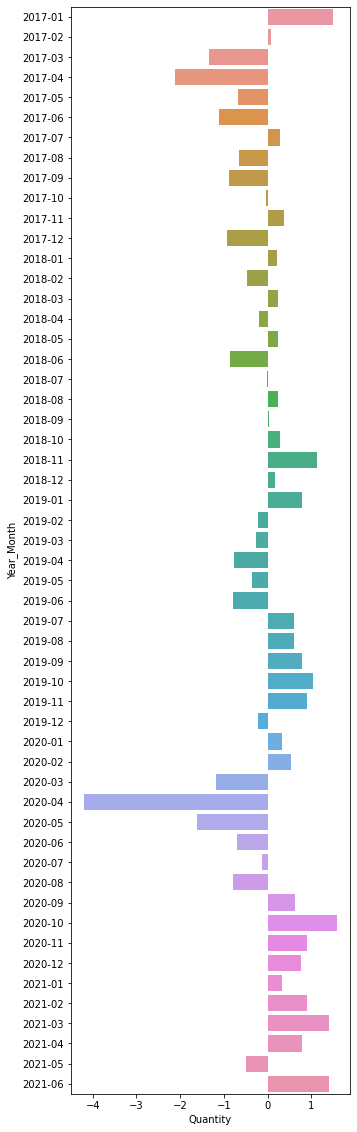

In [25]:
plt.figure(figsize=(5,20))
sns.barplot( x= 'Quantity', y= 'Year_Month', data = data,orient='h')

An obvious problem arises when we look at **corr**

Too many similar/redundant Features.

To remove teh redundancies we will extract the first 'n' letters from the feature name and store them in a new column. Then we will drop duplicates in that column.

Convert corr to a DF

In [26]:
corr_df = pd.DataFrame(corr)
#corr

In [27]:
#df.reset_index(inplace = True, drop = True)
corr_df = corr_df.reset_index(inplace = False, drop = False)
corr_df

,index,Quantity
0,Quantity,1.000000
1,Gray_cement_dispatch_comercial,0.763691
2,Gray_cement_dispatch_other,0.749478
3,Gray_cement_dispatch,0.742108
4,Gray_cement_prod,0.711097
...,...,...
937,Construction_lic_unt_NO_SIlag_4,-0.453457
938,Construction_lic_arealag_4,-0.473548
939,Imports_quantitylag_4,-0.475870
940,Construction_lic_untlag_4,-0.480974


Not precisely what we want but easy to fix

In [28]:
corr_df.columns = ['Feature' , 'Correlation']
corr_df.head(10)

,Feature,Correlation
0,Quantity,1.000000
1,Gray_cement_dispatch_comercial,0.763691
2,Gray_cement_dispatch_other,0.749478
3,Gray_cement_dispatch,0.742108
4,Gray_cement_prod,0.711097
5,Housing_total_sales,0.706916
6,ISE,0.687654
7,Housing_total_sales_SI,0.641345
8,working_day,0.637156
9,Consumer_microcredit,0.617899


Let us add a new column of ABSOLUTE correlation values

In [37]:
corr_df['Absolute_Score']= abs(corr_df['Correlation']).sort_values(ascending=False)

In [38]:
corr_df

,Feature,Correlation,Absolute_Score
0,Quantity,1.000000,1.000000
1,Gray_cement_dispatch_comercial,0.763691,0.763691
2,Gray_cement_dispatch_other,0.749478,0.749478
3,Gray_cement_dispatch,0.742108,0.742108
4,Gray_cement_prod,0.711097,0.711097
...,...,...,...
937,Construction_lic_unt_NO_SIlag_4,-0.453457,0.453457
938,Construction_lic_arealag_4,-0.473548,0.473548
939,Imports_quantitylag_4,-0.475870,0.475870
940,Construction_lic_untlag_4,-0.480974,0.480974


In [39]:
# We extract the first 6 characters.
# We triued various numbers .
# None were thoroughly satisfacrtory just some were less unsatisfactory.
distinct_features = corr_df.assign(rep_feature = corr_df['Feature'].str[:7])

In [40]:
distinct_feature_2 = distinct_features.drop_duplicates(subset=['rep_feature'])

In [195]:
distinct_feature_2.head()

,Feature,Correlation,Absolute_Score,rep_feature
0,Quantity,1.000000,1.000000,Quantit
1,Gray_cement_dispatch_comercial,0.763691,0.763691,Gray_ce
5,Housing_total_sales,0.706916,0.706916,Housing
6,ISE,0.687654,0.687654,ISE
8,working_day,0.637156,0.637156,working


In [196]:
len(distinct_feature_2 )

40

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


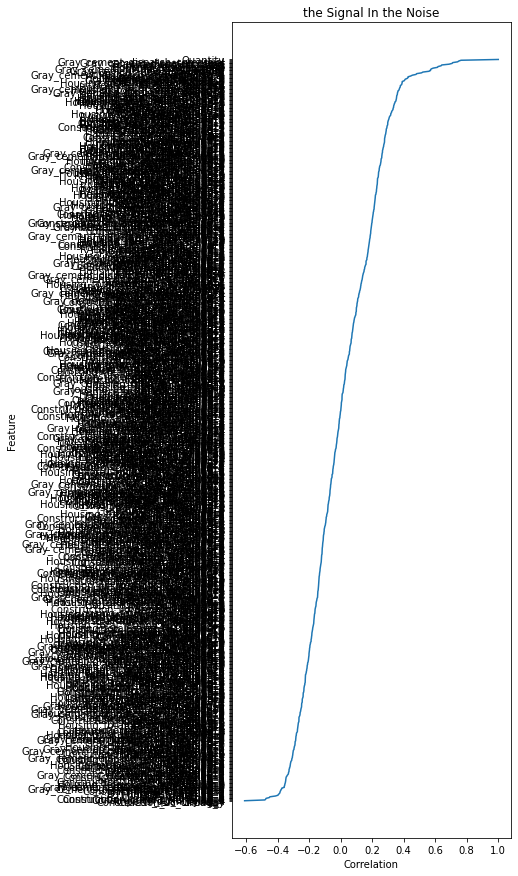

In [50]:
plt.figure(figsize=(5,15))
graph = sns.lineplot('Correlation','Feature' ,data = corr_df).set_title('the Signal In the Noise')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


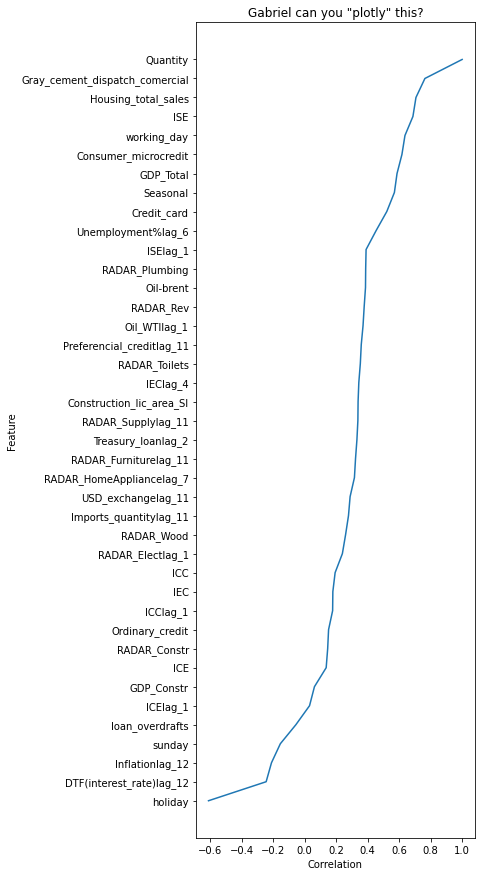

In [48]:
plt.figure(figsize=(5,15))
graph = sns.lineplot('Correlation','Feature' ,data = distinct_feature_2).set_title('Gabriel can you "plotly" this?')
plt.show()

##These Are the 40 Features we will plug into Lasso


We want to reduce out 973 features to the top 40.  We can do this via Merge /Join but fur=isrts we need

In [107]:
distinct_feature_2.head(5)

,Feature,Correlation,Absolute_Score,rep_feature
0,Quantity,1.000000,1.000000,Quantit
1,Gray_cement_dispatch_comercial,0.763691,0.763691,Gray_ce
5,Housing_total_sales,0.706916,0.706916,Housing
6,ISE,0.687654,0.687654,ISE
8,working_day,0.637156,0.637156,working


In [197]:
distinct_feature_2.tail(5)

,Feature,Correlation,Absolute_Score,rep_feature
530,loan_overdrafts,-0.055027,0.055027,loan_ov
688,sunday,-0.153546,0.153546,sunday
767,Inflationlag_12,-0.209769,0.209769,Inflati
813,DTF(interest_rate)lag_12,-0.243694,0.243694,DTF(int
941,holiday,-0.609440,0.609440,holiday


In [ ]:
#data.head(2)

create a new df so we dont mess up the origiginal

In [131]:
data_2 = data

In [ ]:
data_2.head()

# Selected features

In [ ]:
top_40_select_cols = data_2[['date','Quantity','Gray_cement_dispatch_comercial','Housing_total_sales','ISE', 'working_day',
                             'Consumer_microcredit', 'GDP_Total','Seasonal','Credit_card','Unemployment%lag_6',
                             'ISElag_1','RADAR_Plumbing','Oil-brent','RADAR_Rev','Preferencial_creditlag_11',
                             'RADAR_Toilets','IEClag_4','Construction_lic_area_SI','RADAR_Supplylag_11',
                             'RADAR_Supplylag_11','Treasury_loanlag_2','RADAR_Furniturelag_11', 'RADAR_HomeAppliancelag_7',
                             'USD_exchangelag_11', 'Imports_quantitylag_11','RADAR_Wood','RADAR_Electlag_1', 'ICC',
                             'IEC','ICClag_1','Ordinary_credit','RADAR_Constr','ICE' ,'GDP_Constr','ICElag_1',
                             'loan_overdrafts','sunday','Inflationlag_12', 'DTF(interest_rate)lag_12','holiday']]
top_40_select_cols 

In [241]:
top_40_select_cols .head(3)

,date,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
0,2017-01-01,1.503548,502084.8330,17168.0,102.548972,25,331812.3476,206242.568,0.699923,3370234.662,9.845308,103.278437,3.037115e+10,52.19,1.323489e+11,6137144.374,1.727682e+11,-0.5,229478.0,1.544220e+11,1.544220e+11,502571.7271,1.143908e+11,1.038753e+11,3357.50,72648.0,3.136015e+10,9.434221e+10,-30.2,-28.3,-10.7,4498496.510,1.044525e+11,-33.1,14753.34784,-2.6,5515276.146,5,7.45,0.0574,1
1,2017-02-01,0.076213,530826.1625,16196.0,102.919033,24,451305.4187,206242.568,0.316156,3469317.755,8.988420,102.548972,2.138243e+10,53.40,8.351517e+10,6120086.089,1.096908e+11,-4.2,272961.0,1.070383e+11,1.070383e+11,447966.3574,1.664735e+11,8.970825e+10,3145.26,44016.0,2.216364e+10,9.372000e+10,-24.3,-19.9,-30.2,7087850.705,1.574855e+11,-31.0,14753.34784,-33.1,6331676.215,4,7.59,0.0625,0
2,2017-03-01,-1.346258,568447.4880,15388.0,102.162670,26,570278.7259,206242.568,-0.267695,4411360.214,8.507884,102.919033,2.872364e+10,50.43,9.821204e+10,4657354.000,1.191497e+11,-4.7,354904.0,2.416563e+11,2.416563e+11,225521.4428,4.662799e+10,8.686514e+10,2998.71,25876.0,2.258877e+10,6.034851e+10,-21.1,-18.3,-24.3,7736718.499,1.215372e+11,-25.4,14753.34784,-31.0,8189116.436,4,7.98,0.0635,1


In [282]:
#Make date ordinal
import datetime as dt
top_40_select_cols['date'] = pd.to_datetime(top_40_select_cols['date'])
top_40_select_cols['date']=top_40_select_cols['date'].map(dt.datetime.toordinal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [283]:
top_40_select_cols_df = pd.DataFrame(data =top_40_select_cols)

In [284]:
X= top_40_select_cols_df.loc[:, top_40_select_cols_df.columns != 'Quantity']
X.head(3)

,date,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
0,719163,502084.8330,17168.0,102.548972,25,331812.3476,206242.568,0.699923,3370234.662,9.845308,103.278437,3.037115e+10,52.19,1.323489e+11,6137144.374,1.727682e+11,-0.5,229478.0,1.544220e+11,1.544220e+11,502571.7271,1.143908e+11,1.038753e+11,3357.50,72648.0,3.136015e+10,9.434221e+10,-30.2,-28.3,-10.7,4498496.510,1.044525e+11,-33.1,14753.34784,-2.6,5515276.146,5,7.45,0.0574,1
1,719163,530826.1625,16196.0,102.919033,24,451305.4187,206242.568,0.316156,3469317.755,8.988420,102.548972,2.138243e+10,53.40,8.351517e+10,6120086.089,1.096908e+11,-4.2,272961.0,1.070383e+11,1.070383e+11,447966.3574,1.664735e+11,8.970825e+10,3145.26,44016.0,2.216364e+10,9.372000e+10,-24.3,-19.9,-30.2,7087850.705,1.574855e+11,-31.0,14753.34784,-33.1,6331676.215,4,7.59,0.0625,0
2,719163,568447.4880,15388.0,102.162670,26,570278.7259,206242.568,-0.267695,4411360.214,8.507884,102.919033,2.872364e+10,50.43,9.821204e+10,4657354.000,1.191497e+11,-4.7,354904.0,2.416563e+11,2.416563e+11,225521.4428,4.662799e+10,8.686514e+10,2998.71,25876.0,2.258877e+10,6.034851e+10,-21.1,-18.3,-24.3,7736718.499,1.215372e+11,-25.4,14753.34784,-31.0,8189116.436,4,7.98,0.0635,1


In [285]:
y = top_40_select_cols_df.iloc[:,1]  # <- Quantity isolated
y.head(3)

0    1.503548
1    0.076213
2   -1.346258
Name: Quantity, dtype: float64

Convert Date to date type then ordinal

In [245]:
#import datetime as dt
#top_40_select_cols_df ['date'] = pd.to_datetime(top_40_select_cols_df ['date'])
#top_40_select_cols_df ['date']= top_40_select_cols_df ['date'].map(dt.datetime.toordinal)

In [276]:
top_40_select_cols_df.head(3)

,date,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
0,736330,1.503548,502084.8330,17168.0,102.548972,25,331812.3476,206242.568,0.699923,3370234.662,9.845308,103.278437,3.037115e+10,52.19,1.323489e+11,6137144.374,1.727682e+11,-0.5,229478.0,1.544220e+11,1.544220e+11,502571.7271,1.143908e+11,1.038753e+11,3357.50,72648.0,3.136015e+10,9.434221e+10,-30.2,-28.3,-10.7,4498496.510,1.044525e+11,-33.1,14753.34784,-2.6,5515276.146,5,7.45,0.0574,1
1,736361,0.076213,530826.1625,16196.0,102.919033,24,451305.4187,206242.568,0.316156,3469317.755,8.988420,102.548972,2.138243e+10,53.40,8.351517e+10,6120086.089,1.096908e+11,-4.2,272961.0,1.070383e+11,1.070383e+11,447966.3574,1.664735e+11,8.970825e+10,3145.26,44016.0,2.216364e+10,9.372000e+10,-24.3,-19.9,-30.2,7087850.705,1.574855e+11,-31.0,14753.34784,-33.1,6331676.215,4,7.59,0.0625,0
2,736389,-1.346258,568447.4880,15388.0,102.162670,26,570278.7259,206242.568,-0.267695,4411360.214,8.507884,102.919033,2.872364e+10,50.43,9.821204e+10,4657354.000,1.191497e+11,-4.7,354904.0,2.416563e+11,2.416563e+11,225521.4428,4.662799e+10,8.686514e+10,2998.71,25876.0,2.258877e+10,6.034851e+10,-21.1,-18.3,-24.3,7736718.499,1.215372e+11,-25.4,14753.34784,-31.0,8189116.436,4,7.98,0.0635,1


L1 Scale data here

In [277]:
L2_data = top_40_select_cols_df

In [278]:
L2_data_scaled = preprocessing.normalize(L2_data, axis=0, norm='l2')

In [279]:
#data = L2_data_scaled

In [ ]:
X

In [213]:
#HERE

In [ ]:
X

In [ ]:
y

In [263]:
#dataframe = data


In [ ]:
#data = dataframe.values

In [266]:
data

array([[ 0.13593402,  0.20479264,  0.12525979, ...,  0.20975787,
         0.14294763,  0.02956562],
       [ 0.13593975,  0.01038075,  0.13243016, ...,  0.21369963,
         0.15564855,  0.        ],
       [ 0.13594492, -0.1833688 ,  0.1418159 , ...,  0.22468024,
         0.15813893,  0.02956562],
       ...,
       [ 0.13622036,  0.10874844,  0.14882193, ...,  0.09882552,
         0.11331214,  0.05913124],
       [ 0.13622589, -0.0684973 ,  0.11027595, ...,  0.08024294,
         0.10683716,  0.05913124],
       [ 0.13623162,  0.19288267,  0.15190741, ...,  0.06166037,
         0.09363817,  0.05913124]])

In [286]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [287]:
# define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs= -1) # or neg 1

In [288]:
# fit model
model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1628700107830232, tolerance: 0.0044951317631074265
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8750804612562382, tolerance: 0.0044951317631074265
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8957071499310536, tolerance: 0.0044951317631074265
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1), n_jobs=-1)

transpose it

In [110]:
data_2_T = data_2.T

In [111]:
data_2_T.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
date,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00
Quantity,1.50355,0.0762135,-1.34626,-2.12258,-0.665067,-1.109,0.294088,-0.654309,-0.880117,-0.0292252,0.373554,-0.918428,0.217014,-0.480017,0.239959,-0.206177,0.249768,-0.852038,-0.0129917,0.249367,0.039486,0.278298,1.13738,0.181688,0.782357,-0.210215,-0.271357,-0.775169,-0.357646,-0.801275,0.603343,0.607892,0.782147,1.03534,0.897047,-0.218203,0.324951,0.532752,-1.16876,-4.21206,-1.61207,-0.688802,-0.125089,-0.78836,0.633605,1.59439,0.913382,0.75955,0.337465,0.903134,1.40755,0.79841,-0.502894,1.41611
Seasonal,0.699923,0.316156,-0.267695,-2.41987,-0.644222,-0.938441,0.649509,0.102205,0.483263,1.24643,1.38057,0.0177877,0.699923,0.316156,-0.267695,-2.41987,-0.644222,-0.938441,0.649509,0.102205,0.483263,1.24643,1.38057,0.0177877,0.699923,0.316156,-0.267695,-2.41987,-0.644222,-0.938441,0.649509,0.102205,0.483263,1.24643,1.38057,0.0177877,0.699923,0.316156,-0.267695,-2.41987,-0.644222,-0.938441,0.649509,0.102205,0.483263,1.24643,1.38057,0.0177877,0.699923,0.316156,-0.267695,-2.41987,-0.644222,-0.938441


madke the index a column

In [112]:
# make the index into a column
#data_2_T['index'] = data_2_T.index
data_2_T.reset_index(level=0,inplace=True)

In [113]:
data_2_T.head(3)

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,date,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00
1,Quantity,1.50355,0.0762135,-1.34626,-2.12258,-0.665067,-1.109,0.294088,-0.654309,-0.880117,-0.0292252,0.373554,-0.918428,0.217014,-0.480017,0.239959,-0.206177,0.249768,-0.852038,-0.0129917,0.249367,0.039486,0.278298,1.13738,0.181688,0.782357,-0.210215,-0.271357,-0.775169,-0.357646,-0.801275,0.603343,0.607892,0.782147,1.03534,0.897047,-0.218203,0.324951,0.532752,-1.16876,-4.21206,-1.61207,-0.688802,-0.125089,-0.78836,0.633605,1.59439,0.913382,0.75955,0.337465,0.903134,1.40755,0.79841,-0.502894,1.41611
2,Seasonal,0.699923,0.316156,-0.267695,-2.41987,-0.644222,-0.938441,0.649509,0.102205,0.483263,1.24643,1.38057,0.0177877,0.699923,0.316156,-0.267695,-2.41987,-0.644222,-0.938441,0.649509,0.102205,0.483263,1.24643,1.38057,0.0177877,0.699923,0.316156,-0.267695,-2.41987,-0.644222,-0.938441,0.649509,0.102205,0.483263,1.24643,1.38057,0.0177877,0.699923,0.316156,-0.267695,-2.41987,-0.644222,-0.938441,0.649509,0.102205,0.483263,1.24643,1.38057,0.0177877,0.699923,0.316156,-0.267695,-2.41987,-0.644222,-0.938441


rename the columns

In [ ]:
data_2_T = data_2_T.rename({'index':'Feature'}, axis=1)

In [115]:
data_2_T.head(2)

,Feature,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,date,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00
1,Quantity,1.50355,0.0762135,-1.34626,-2.12258,-0.665067,-1.109,0.294088,-0.654309,-0.880117,-0.0292252,0.373554,-0.918428,0.217014,-0.480017,0.239959,-0.206177,0.249768,-0.852038,-0.0129917,0.249367,0.039486,0.278298,1.13738,0.181688,0.782357,-0.210215,-0.271357,-0.775169,-0.357646,-0.801275,0.603343,0.607892,0.782147,1.03534,0.897047,-0.218203,0.324951,0.532752,-1.16876,-4.21206,-1.61207,-0.688802,-0.125089,-0.78836,0.633605,1.59439,0.913382,0.75955,0.337465,0.903134,1.40755,0.79841,-0.502894,1.41611


In [ ]:
data_2_T.loc[data_2_T]==

########

In [116]:
distinct_feature_2_transposed.head(2)

Feature,index,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
0,Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
1,Correlation,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,-0.0550268,-0.153546,-0.209769,-0.243694,-0.60944


distinct_feature_2_transposed.convert to DF

In [117]:
distinct_feature_2_transposed = pd.DataFrame(data=distinct_feature_2_transposed)


In [118]:
distinct_feature_2_transposed.head(2)

Feature,index,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
0,Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
1,Correlation,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,-0.0550268,-0.153546,-0.209769,-0.243694,-0.60944


In [120]:
A = pd.DataFrame(distinct_feature_2_transposed)

In [121]:
A

Feature,index,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
0,Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
1,Correlation,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,-0.0550268,-0.153546,-0.209769,-0.243694,-0.60944
2,Absolute_Score,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,0.0550268,0.153546,0.209769,0.243694,0.60944
3,rep_feature,Quantit,Gray_ce,Housing,ISE,working,Consume,GDP_Tot,Seasona,Credit_,Unemplo,ISElag_,RADAR_P,Oil-bre,RADAR_R,Oil_WTI,Prefere,RADAR_T,IEClag_,Constru,RADAR_S,Treasur,RADAR_F,RADAR_H,USD_exc,Imports,RADAR_W,RADAR_E,ICC,IEC,ICClag_,Ordinar,RADAR_C,ICE,GDP_Con,ICElag_,loan_ov,sunday,Inflati,DTF(int,holiday


In [122]:
.head()

Feature,index,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
0,Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
1,Correlation,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,-0.0550268,-0.153546,-0.209769,-0.243694,-0.60944
2,Absolute_Score,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,0.0550268,0.153546,0.209769,0.243694,0.60944
3,rep_feature,Quantit,Gray_ce,Housing,ISE,working,Consume,GDP_Tot,Seasona,Credit_,Unemplo,ISElag_,RADAR_P,Oil-bre,RADAR_R,Oil_WTI,Prefere,RADAR_T,IEClag_,Constru,RADAR_S,Treasur,RADAR_F,RADAR_H,USD_exc,Imports,RADAR_W,RADAR_E,ICC,IEC,ICClag_,Ordinar,RADAR_C,ICE,GDP_Con,ICElag_,loan_ov,sunday,Inflati,DTF(int,holiday


In [103]:
distinct_feature_2_transposed.head(2)

Feature,index,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
0,Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
1,Correlation,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,-0.0550268,-0.153546,-0.209769,-0.243694,-0.60944


In [124]:
#data_2_T = data_2_T.rename({'level_0':'Feature'}, axis=1)
distinct_feature_2_transposed=distinct_feature_2_transposed.rename({'Feature':'index', 'index':'Feature'}, axis = 1)

In [125]:
distinct_feature_2_transposed

Feature,Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
0,Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
1,Correlation,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,-0.0550268,-0.153546,-0.209769,-0.243694,-0.60944
2,Absolute_Score,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,0.0550268,0.153546,0.209769,0.243694,0.60944
3,rep_feature,Quantit,Gray_ce,Housing,ISE,working,Consume,GDP_Tot,Seasona,Credit_,Unemplo,ISElag_,RADAR_P,Oil-bre,RADAR_R,Oil_WTI,Prefere,RADAR_T,IEClag_,Constru,RADAR_S,Treasur,RADAR_F,RADAR_H,USD_exc,Imports,RADAR_W,RADAR_E,ICC,IEC,ICClag_,Ordinar,RADAR_C,ICE,GDP_Con,ICElag_,loan_ov,sunday,Inflati,DTF(int,holiday


In [128]:
distinct_feature_2_transposed.index.name = None

In [129]:
distinct_feature_2_transposed

Feature,Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
0,Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
1,Correlation,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,-0.0550268,-0.153546,-0.209769,-0.243694,-0.60944
2,Absolute_Score,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,0.0550268,0.153546,0.209769,0.243694,0.60944
3,rep_feature,Quantit,Gray_ce,Housing,ISE,working,Consume,GDP_Tot,Seasona,Credit_,Unemplo,ISElag_,RADAR_P,Oil-bre,RADAR_R,Oil_WTI,Prefere,RADAR_T,IEClag_,Constru,RADAR_S,Treasur,RADAR_F,RADAR_H,USD_exc,Imports,RADAR_W,RADAR_E,ICC,IEC,ICClag_,Ordinar,RADAR_C,ICE,GDP_Con,ICElag_,loan_ov,sunday,Inflati,DTF(int,holiday


In [100]:
#df1[df1.Noun.isin(df.Noun)]
data_2_T[data_2_T.Feature.isin(distinct_feature_2_transposed.Feature)]

AttributeError: ignored

In [83]:
distinct_feature_2_transposed = pd.DataFrame(data= distinct_feature_2_transposed)

In [85]:
distinct_feature_2_transposed.head(2)

Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
Correlation,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,-0.0550268,-0.153546,-0.209769,-0.243694,-0.60944


In [86]:
distinct_feature_2_transposed.reindex(column,axis = 'columns')

NameError: ignored

In [84]:
#df1[df1.Noun.isin(df.Noun)]
data_2_T[data_2_T.Feature.isin(distinct_feature_2_transposed.Feature)]

AttributeError: ignored

Here we reuce the origial dataset to just the 40 features found in our deistinct data set.  



In [ ]:
#make the index into a column
data_2.set_index

In [ ]:
#df1[df1.Noun.isin(df.Noun)]
# keep all in df1 that have matches in df

data[data.]

hmmmm

In [58]:
header_row = 0
distinct_feature_2_transposed.columns= distinct_feature_2_transposed.iloc[header_row]
distinct_feature_2_transposed

Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
Correlation,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,-0.0550268,-0.153546,-0.209769,-0.243694,-0.60944
Absolute_Score,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,0.0550268,0.153546,0.209769,0.243694,0.60944
rep_feature,Quantit,Gray_ce,Housing,ISE,working,Consume,GDP_Tot,Seasona,Credit_,Unemplo,ISElag_,RADAR_P,Oil-bre,RADAR_R,Oil_WTI,Prefere,RADAR_T,IEClag_,Constru,RADAR_S,Treasur,RADAR_F,RADAR_H,USD_exc,Imports,RADAR_W,RADAR_E,ICC,IEC,ICClag_,Ordinar,RADAR_C,ICE,GDP_Con,ICElag_,loan_ov,sunday,Inflati,DTF(int,holiday


In [66]:
distinct_feature_2_transposed

Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
Feature,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Oil_WTIlag_1,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
Correlation,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,-0.0550268,-0.153546,-0.209769,-0.243694,-0.60944
Absolute_Score,1,0.763691,0.706916,0.687654,0.637156,0.617899,0.586808,0.570067,0.521891,0.45433,0.390428,0.387901,0.386743,0.378404,0.371172,0.359866,0.353909,0.34433,0.339714,0.338364,0.332389,0.323496,0.316493,0.28908,0.278793,0.260436,0.24004,0.193964,0.179542,0.178169,0.152427,0.146699,0.137248,0.0627797,0.0317109,0.0550268,0.153546,0.209769,0.243694,0.60944
rep_feature,Quantit,Gray_ce,Housing,ISE,working,Consume,GDP_Tot,Seasona,Credit_,Unemplo,ISElag_,RADAR_P,Oil-bre,RADAR_R,Oil_WTI,Prefere,RADAR_T,IEClag_,Constru,RADAR_S,Treasur,RADAR_F,RADAR_H,USD_exc,Imports,RADAR_W,RADAR_E,ICC,IEC,ICClag_,Ordinar,RADAR_C,ICE,GDP_Con,ICElag_,loan_ov,sunday,Inflati,DTF(int,holiday


In [67]:
A = distinct_feature_2_transposed

In [68]:
A.T

,Feature,Correlation,Absolute_Score,rep_feature
Feature,,,,
Quantity,Quantity,1,1,Quantit
Gray_cement_dispatch_comercial,Gray_cement_dispatch_comercial,0.763691,0.763691,Gray_ce
Housing_total_sales,Housing_total_sales,0.706916,0.706916,Housing
ISE,ISE,0.687654,0.687654,ISE
working_day,working_day,0.637156,0.637156,working
Consumer_microcredit,Consumer_microcredit,0.617899,0.617899,Consume
GDP_Total,GDP_Total,0.586808,0.586808,GDP_Tot
Seasonal,Seasonal,0.570067,0.570067,Seasona
Credit_card,Credit_card,0.521891,0.521891,Credit_


Lasso cannot handle date type we will start by converitn it to ordinal type

In [ ]:
import datetime as dt
data['date'] = pd.to_datetime(data['date'])
data['date']=data['date'].map(dt.datetime.toordinal)